# Import library

In [2]:
#import library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
import requests
import os
import tweepy
import json

# Gathering

In [2]:
#open csv file of archive twitter data frame
archive_df= pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
#request tsv file of Image predictions dataframe
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]),mode='wb')as file:
    file.write(response.content)

In [3]:
#open tsv file of Image predictions dataframe
Image_predictions_df= pd.read_csv('image-predictions.tsv',sep="\t")

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'N1OeDkhcROSAMjy4ylnh69ETm'
consumer_secret = 'x9XX3x7PYpoP376vdjofqJqaAjqJu4OCSTjJ3sBwuxTXnvRr4w'
access_token = '800453909030445056-OYqIqxC8mM90XXR2Ozmt8waKtKw1fr3'
access_secret = 'TRwAAIgQbWDCAyEoBcnHwftCEVqpLRicCP3lNrmk9Z6up'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [5]:
tweet_ID=[]
for index in range (0,len(tweets)):
    tweet_ID.append(tweets[index]['id'])

In [6]:
retweet_count=[]
for index in range (0,len(tweets)):
    retweet_count.append(tweets[index]['retweet_count'])

In [7]:
favouritescount=[]
for index in range (0,len(tweets)):
    favouritescount.append(tweets[index]['favorite_count'])

In [8]:
api_df  = pd.DataFrame(
    {'tweet_id': tweet_ID,
     'retweet_count': retweet_count,
     'favouritescount': favouritescount,
     
    })

# Assessing

In [9]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
archive_df['text'].duplicated().sum()

0

In [13]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
none_v_d=archive_df['doggo']!='None'
none_v_d.sum()

97

In [16]:
none_v_f=archive_df['floofer']!='None'
none_v_f.sum()

10

In [17]:
none_v_pr=archive_df['pupper']!='None'
none_v_pr.sum()

257

In [18]:
none_v_po=archive_df['puppo']!='None'
none_v_po.sum()

30

In [19]:
2356-(none_v_po.sum()+none_v_pr.sum()+none_v_f.sum()+none_v_d.sum())

1962

In [20]:
name_a= archive_df['name']=='a'
name_a.sum()

55

In [21]:
name_none= archive_df['name']=='None'
name_none.sum()

745

In [22]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
Image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
Image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
Image_predictions_df['tweet_id'].duplicated().sum()

0

In [28]:
Image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
api_df

,tweet_id,retweet_count,favouritescount
0,892420643555336193,7511,35524
1,892177421306343426,5574,30745
2,891815181378084864,3690,23111
3,891689557279858688,7694,38814
4,891327558926688256,8294,37093
...,...,...,...
2322,666049248165822465,40,96
2323,666044226329800704,126,266
2324,666033412701032449,39,110
2325,666029285002620928,41,120


In [30]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2327 non-null   int64
 1   retweet_count    2327 non-null   int64
 2   favouritescount  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
api_df.head()

,tweet_id,retweet_count,favouritescount
0,892420643555336193,7511,35524
1,892177421306343426,5574,30745
2,891815181378084864,3690,23111
3,891689557279858688,7694,38814
4,891327558926688256,8294,37093


In [32]:
api_df['tweet_id'].duplicated().sum()

0

## archive dataframe

### quality
- missing data at (in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- missing data at (expanded_urls)
- (timestamp) is string 
- (rating_numerator and rating_denominator) are strings
- (retweeted_status_timestamp) is string
- values of name is called 'none'
- values of name is called 'a' and 'an' and 'the'
- values of (doggo,floofer, pupper, puppo) is called 'None'
- incorrected values at (in_reply_to_status_id , in_reply_to_user_id)
- rate not valid(rating_denominator= 0 ,>10 and rating_numerator= 0 ,>14)
### tideness
- archive table not have one object
- column headers are values not variable name (	doggo  floofer	pupper	puppo)
- multiple variables are stored in one variable(text)

## Image predictions dataframe

### quality
- name of variable not clear

# Clean Data

In [33]:
#copy dataframes
archive_copy=archive_df.copy()
Image_predictions_copy=Image_predictions_df.copy()
api_copy= api_df.copy()

In [34]:
archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [35]:
Image_predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [36]:
api_copy

,tweet_id,retweet_count,favouritescount
0,892420643555336193,7511,35524
1,892177421306343426,5574,30745
2,891815181378084864,3690,23111
3,891689557279858688,7694,38814
4,891327558926688256,8294,37093
...,...,...,...
2322,666049248165822465,40,96
2323,666044226329800704,126,266
2324,666033412701032449,39,110
2325,666029285002620928,41,120


- missing data at (in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- (retweeted_status_timestamp) is string
- incorrected values at (in_reply_to_status_id , in_reply_to_user_id)

## Define

- drop columns  (in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

## Code

In [37]:
labels=['in_reply_to_status_id' ,'in_reply_to_user_id' ,'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
archive_copy.drop(axis=1,columns=labels,inplace=True)

## Test

In [38]:
archive_copy.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

- #### missing data at (expanded_urls)

## Define

drop rows that have missing expanded_urls 

## Code

In [39]:
archive_copy.dropna(inplace=True)

## Test

In [40]:
archive_copy.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

- #### (timestamp) is string 
     

## Define

convert data type of timestamp from string to date

## Code

In [41]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

## Test

In [42]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   int64              
 6   rating_denominator  2297 non-null   int64              
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [43]:
archive_copy['timestamp']

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2297, dtype: datetime64[ns, UTC]

- ####  (rating_numerator and rating_denominator) are strings


## Define

convert datatype of (rating_numerator and rating_denominator) fron strings to int

## Code

In [44]:
archive_copy['rating_numerator'] = archive_copy['rating_numerator'].astype(float)
archive_copy['rating_denominator'] = archive_copy['rating_denominator'].astype(float)

## Test

In [45]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2297 non-null   int64              
 1   timestamp           2297 non-null   datetime64[ns, UTC]
 2   source              2297 non-null   object             
 3   text                2297 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2297 non-null   float64            
 6   rating_denominator  2297 non-null   float64            
 7   name                2297 non-null   object             
 8   doggo               2297 non-null   object             
 9   floofer             2297 non-null   object             
 10  pupper              2297 non-null   object             
 11  puppo               2297 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

- #### values of name is called 'a', 'an' and 'the'

## Define

 convert values of name is called 'a' and 'the' and 'an' to None

## Code

In [46]:
archive_copy['name'].replace('a', 'None',inplace=True)
archive_copy['name'].replace('an', 'None',inplace=True)
archive_copy['name'].replace('the', 'None',inplace=True)

## Test

In [47]:
name_a_c= archive_copy['name']=='a'
name_a_c.sum()

0

In [48]:
name_an_c= archive_copy['name']=='an'
name_an_c.sum()

0

In [49]:
name_the_c= archive_copy['name']=='the'
name_the_c.sum()

0

- #### rate not valid(rating_denominator= 0 and rating_numerator= 0)

## Define

drop rows that have rating_denominator= 0 ,>10 or rating_numerator= 0 ,>14 

## Code

In [50]:
archive_copy.rating_denominator = archive_copy.rating_denominator[archive_copy.rating_denominator != 0]

In [51]:
archive_copy.rating_numerator = archive_copy.rating_numerator[archive_copy.rating_numerator != 0]

In [52]:
archive_copy.rating_denominator = archive_copy.rating_denominator[archive_copy.rating_denominator == 10]

In [53]:
archive_copy.rating_numerator = archive_copy.rating_numerator[archive_copy.rating_numerator <= 14]

## Test

In [54]:
archive_copy['rating_denominator'].value_counts()

10.0    2278
Name: rating_denominator, dtype: int64

In [55]:
archive_copy['rating_numerator'].value_counts()


12.0    547
10.0    455
11.0    455
13.0    339
9.0     156
8.0     102
7.0      53
14.0     50
5.0      35
6.0      32
3.0      19
4.0      16
2.0       9
1.0       6
Name: rating_numerator, dtype: int64

- #### multiple variables are stored in one variable(text)

## Define

- extract link from text and put in column 'link' and add text to 'Text' column then drop text column

## Code

In [56]:
archive_copy[["Text", "link"]] = archive_copy["text"].str.split("https",n=1, expand=True)
archive_copy['link']='https'+archive_copy['link']
archive_copy.drop(axis=1,columns='text',inplace=True)

## Test

In [57]:
archive_copy.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Text,link
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f


In [58]:
archive_copy.to_csv('test.csv')

- ####  column headers are values not variable name (	doggo  floofer	pupper	puppo)
- ####  archive table not have one object

## Define

convert header of variables from doggo, floofer, pupper and puppo to one variable stadge_of_dog and store values in stadge_of_dogs dataframe 
then drop name,doggo, floofer, pupper and puppo from archive_copy dataframe

## Code

In [59]:
stage_of_dogs=archive_copy[['tweet_id','name','doggo', 'floofer', 'pupper', 'puppo']]
stage_of_dogs=stage_of_dogs.melt(id_vars=["tweet_id","name"],var_name=["stadge_of_dog"])
stage_of_dogs=stage_of_dogs[stage_of_dogs.value!='None']
stage_of_dogs.drop(axis=1,columns='value',inplace=True)
archive_copy.drop(axis=1,columns=['name','doggo', 'floofer', 'pupper', 'puppo'],inplace=True)

## Test

In [60]:
stage_of_dogs

,tweet_id,name,stadge_of_dog
9,890240255349198849,Cassie,doggo
42,884162670584377345,Yogi,doggo
96,872967104147763200,None,doggo
105,871515927908634625,Napolean,doggo
107,871102520638267392,None,doggo
...,...,...,...
7806,752519690950500352,None,puppo
7820,751132876104687617,Cooper,puppo
7892,744995568523612160,Abby,puppo
7905,743253157753532416,Kilo,puppo


In [61]:
archive_copy.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,Text,link
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13.0,10.0,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13.0,10.0,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12.0,10.0,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13.0,10.0,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12.0,10.0,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f


- #### name of variable in Image_predictions_df not clear

## Define

change name of variables to clear names (prediction1,prediction2,prediction3,prediction1_confidence, prediction2_confidence, prediction2_confidence)

## Code

In [62]:
Image_predictions_copy.columns=['tweet_id','jpg_url','img_num','prediction1','prediction1_confidence',
                                'prediction1_dog','prediction2','prediction2_confidence','prediction2_dog',
                                'prediction3','prediction3_confidence','prediction3_dog']

## Test

In [63]:
Image_predictions_copy

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#     

# Storing

In [64]:
# merge data in one dataframe
master_dataframe=pd.merge(archive_copy, Image_predictions_copy, how ='left', on ='tweet_id') 
master_dataframe=pd.merge(master_dataframe, api_copy, how ='left', on ='tweet_id')

In [65]:
master_dataframe['rate'] = (master_dataframe['rating_numerator']/master_dataframe['rating_denominator'])*10

In [66]:
master_dataframe

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,Text,link,jpg_url,img_num,...,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,retweet_count,favouritescount,rate
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13.0,10.0,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,7511.0,35524.0,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13.0,10.0,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5574.0,30745.0,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12.0,10.0,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,3690.0,23111.0,12.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13.0,10.0,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7694.0,38814.0,13.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12.0,10.0,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8294.0,37093.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666049248...,5.0,10.0,Here we have a 1949 1st generation vulpix. Enj...,https://t.co/4B7cOc1EDq,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,40.0,96.0,5.0
2293,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6.0,10.0,This is a purebred Piers Morgan. Loves to Netf...,https://t.co/DWnyCjf2mx,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,126.0,266.0,6.0
2294,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...,9.0,10.0,Here is a very happy pup. Big fan of well-main...,https://t.co/y671yMhoiR,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,...,True,malinois,0.138584,True,bloodhound,0.116197,True,39.0,110.0,9.0
2295,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7.0,10.0,This is a western brown Mitsubishi terrier. Up...,https://t.co/r7mOb2m0UI,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,41.0,120.0,7.0


In [67]:
master_dataframe.rate.describe()

count    2269.000000
mean       10.709123
std         2.122985
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rate, dtype: float64

In [68]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2296
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2297 non-null   int64              
 1   timestamp               2297 non-null   datetime64[ns, UTC]
 2   source                  2297 non-null   object             
 3   expanded_urls           2297 non-null   object             
 4   rating_numerator        2274 non-null   float64            
 5   rating_denominator      2278 non-null   float64            
 6   Text                    2297 non-null   object             
 7   link                    2286 non-null   object             
 8   jpg_url                 2075 non-null   object             
 9   img_num                 2075 non-null   float64            
 10  prediction1             2075 non-null   object             
 11  prediction1_confidence  2075 non-null   flo

In [69]:
master_dataframe.to_csv('twitter_archive_master.csv')

# 

In [70]:
dogs_rate=pd.merge(stage_of_dogs, archive_copy[['tweet_id','rating_numerator','rating_denominator']], how ='left', on ='tweet_id')

In [71]:
dogs_rate['rate'] = (dogs_rate['rating_numerator']/dogs_rate['rating_denominator'])*10

In [72]:
dogs_rate

,tweet_id,name,stadge_of_dog,rating_numerator,rating_denominator,rate
0,890240255349198849,Cassie,doggo,14.0,10.0,14.0
1,884162670584377345,Yogi,doggo,12.0,10.0,12.0
2,872967104147763200,None,doggo,12.0,10.0,12.0
3,871515927908634625,Napolean,doggo,12.0,10.0,12.0
4,871102520638267392,None,doggo,14.0,10.0,14.0
...,...,...,...,...,...,...
383,752519690950500352,None,puppo,11.0,10.0,11.0
384,751132876104687617,Cooper,puppo,10.0,10.0,10.0
385,744995568523612160,Abby,puppo,9.0,10.0,9.0
386,743253157753532416,Kilo,puppo,10.0,10.0,10.0


In [73]:
dogs_rate.to_csv('dogs_stage.csv')

# Analysing and Visualising

In [3]:
pd.plotting.scatter_matrix(master_dataframe, alpha=0.2,figsize=(20,20))

NameError: name 'master_dataframe' is not defined

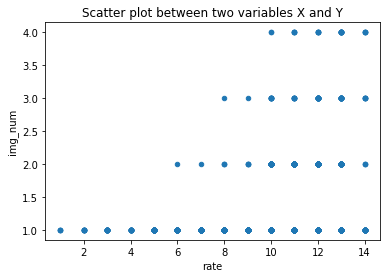

In [75]:
master_dataframe.plot.scatter(x='rate', y='img_num', title= "Scatter plot between two variables X and Y");
plot.show(block=True);

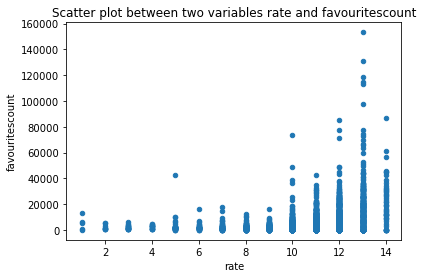

In [76]:
master_dataframe.plot.scatter(x='rate', y='favouritescount', title= "Scatter plot between two variables rate and favouritescount");
plot.show(block=True);

<AxesSubplot:>

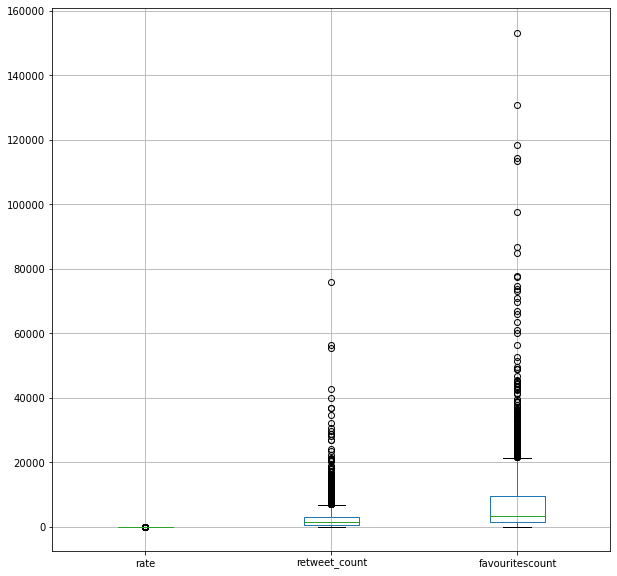

In [77]:
master_dataframe.boxplot(column=['rate', 'retweet_count','favouritescount'],figsize=(10,10))

Text(0, 0.5, 'Frequency')

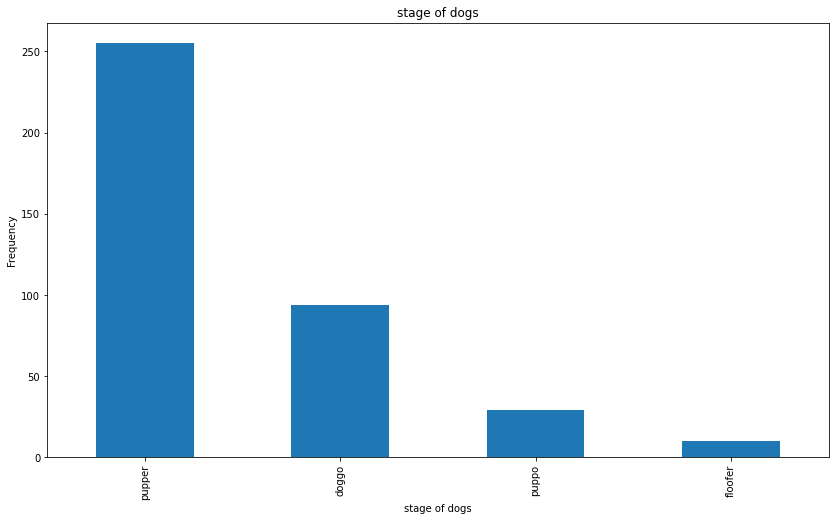

In [78]:
ax = dogs_rate['stadge_of_dog'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="stage of dogs")
ax.set_xlabel("stage of dogs")
ax.set_ylabel("Frequency")